## Mi primer Programa 

In [136]:
from sklearn.datasets import fetch_openml
import pandas as pd

# Cargar dataset real desde OpenML
data = fetch_openml(name='default-of-credit-card-clients', version=1, as_frame=True)
# Convertir a DataFrame

# Visualizar los primeros registros
print(df.shape)
###df.head()

(30000, 24)


In [146]:
df.head(3)


,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x15,x16,x17,x18,x19,x20,x21,x22,x23,y
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0


In [100]:
directorio = "C:\\Users\\damaso.hernandez\\Desktop\\Videos\\Backup. Damaso hernandez\\0.CARPERTA CORDINACION\\0.CORDINACION ANALITICA\\18. PERSONAL\\0..DIPLOMADO SAGRILAFT\\EJEMPLO_21102025"


In [98]:
import os

print("📍 Directorio actual:")
print(os.getcwd())

📍 Directorio actual:
C:\Users\damaso.hernandez\Desktop\Videos\Backup. Damaso hernandez\0.CARPERTA CORDINACION\0.CORDINACION ANALITICA\18. PERSONAL\0..DIPLOMADO SAGRILAFT\EJEMPLO_21102025


## Descripción general
Este conjunto de datos contiene información financiera y demográfica de 30,000 clientes de tarjetas de crédito, con el fin de predecir si el cliente incumplirá el pago del mes siguiente (default.payment.next.month). Es ideal para segmentación de riesgo, clasificación crediticia y análisis de comportamiento financiero en contextos como SAGRILAFT


# Detección de LA/FT en Tarjetas de Crédito (Enfoque SAGRILAFT)

## 1️⃣ Perfilación inicial del cliente (KYC reforzado)
Antes de analizar movimientos, se define **cómo debería comportarse el cliente** según su información:
- Ingresos declarados.
- Actividad económica.
- Ubicación habitual.
- Historial de transacciones previas.
- Segmento de riesgo (alto, medio, bajo) según normativa.

**Objetivo:** Tener una “línea base” para detectar desviaciones.  
Ejemplo:  
> Un cliente con ingresos declarados de $4 millones mensuales no debería pagar $15 millones a su tarjeta en un solo mes sin justificación.

---

## 2️⃣ Variables clave a monitorear
En tarjetas de crédito, las más útiles para detectar LA/FT son:

| Variable | Señal de alerta |
|----------|-----------------|
| **Avances en efectivo** | Aumentos abruptos, operaciones repetidas el mismo día, uso en diferentes ciudades/países. |
| **Pagos a la tarjeta** | Monto alto, origen desconocido (terceros), pagos desde cuentas extranjeras o no registradas. |
| **Incrementos súbitos del gasto** | Pasar de un consumo promedio de $2M a $12M en un mes sin cambio de perfil. |
| **Compras internacionales** | En países catalogados como de alto riesgo por GAFI o sin relación con el cliente. |
| **Devoluciones frecuentes** | Compra de bienes de alto valor y devolución para recibir dinero en cuenta. |
| **Uso de múltiples tarjetas** | Pagos cruzados entre tarjetas del mismo cliente o de terceros. |

---

## 3️⃣ Técnicas de detección

### 🔹 a) Reglas de negocio (indicadores inusuales)
- Pagos superiores al 80% del límite de crédito en una sola transacción.  
- Más de X avances de efectivo en un día.  
- Pagos de más de $10 millones desde una cuenta no asociada.  
- Compras recurrentes en giros postales, joyerías, casas de empeño.  

### 🔹 b) Analítica avanzada / Machine Learning
- **Análisis de outliers**: detectar transacciones alejadas del comportamiento histórico del cliente.  
- **Modelos de clustering**: segmentar clientes por patrones de gasto y detectar cambios bruscos de segmento.  
- **Modelos supervisados**: entrenar un clasificador con operaciones históricas marcadas como sospechosas o confirmadas como LA/FT.  

---

## 4️⃣ Indicadores cruzados con default
En el dataset, la variable `default.payment.next.month` puede ser útil:
- Un cliente que **incumple pagos** y **hace operaciones atípicas** es doblemente riesgoso.
- Ejemplo: Deja de pagar, pero antes hace un avance de $8 millones y se desaparece.
- Esto podría ser indicio de **uso fraudulento o “quema” de crédito** para mover fondos ilícitos.

---

## 5️⃣ Ejemplo práctico de detección

| Mes | Gasto promedio | Pago total | Origen de pagos | Avances de efectivo |
|-----|----------------|------------|------------------|---------------------|
| Ene | $1.5M          | $1.5M      | Nómina           | $0                  |
| Feb | $1.7M          | $1.7M      | Nómina           | $0                  |
| Mar | $12M           | $12M       | Transferencia int. (Panamá) | $9M |
| Abr | $0             | $0         | —                | —                   |

**Alertas detectadas:**
- **Desviación brusca** en gasto y pagos.  
- Origen del pago desde jurisdicción de riesgo (Panamá).  
- Uso masivo de avance en efectivo.  
- Inactividad posterior (patrón típico de "layering").  

---

## 6️⃣ Flujo SAGRILAFT para tarjetas de crédito
1. **Definir perfil esperado** del cliente (KYC).  
2. **Monitorear diariamente** las variables clave.  
3. **Aplicar reglas y modelos analíticos** para generar alertas.  
4. **Analizar y documentar** la operación inusual.  
5. Si aplica, **reportar ROS** a la UIAF.  
6. **Retroalimentar** el sistema con casos confirmados.


| Variable                        | Descripción                                                                                                                           |
| ------------------------------- | ------------------------------------------------------------------------------------------------------------------------------------- |
| **ID**                          | Identificador del cliente                                                                                                             |
| **LIMIT\_BAL**                  | Monto del crédito otorgado (en NT\$)                                                                                                  |
| **SEX**                         | Género (1 = Masculino, 2 = Femenino)                                                                                                  |
| **EDUCATION**                   | Nivel educativo (1 = posgrado, 2 = universidad, 3 = secundaria, 4 = otros)                                                            |
| **MARRIAGE**                    | Estado civil (1 = casado, 2 = soltero, 3 = otros)                                                                                     |
| **AGE**                         | Edad del cliente en años                                                                                                              |
| **PAY\_0** a **PAY\_6**         | Historial de pagos (estado de reembolso desde septiembre hasta abril, donde -1 = pago debidamente, 0 = al día, 1-9 = demora en meses) |
| **BILL\_AMT1** a **BILL\_AMT6** | Monto de la factura por mes (últimos 6 meses)                                                                                         |
| **PAY\_AMT1** a **PAY\_AMT6**   | Monto del pago realizado por mes (últimos 6 meses)                                                                                    |
| **default.payment.next.month**  | Variable objetivo: 1 = incumplimiento de pago, 0 = pago realizado                                                                     |


#Segmentacion

Se Propone una segmentación no supervisada primero (clustering), y luego analizar qué segmentos están asociados a mayor riesgo a partir de variables de alerta. Esto es muy coherente con un enfoque SAGRILAFT basado en perfiles.

| Variable      | Descripción breve                 |
| ------------- | --------------------------------- |
| `LIMIT_BAL`   | Crédito otorgado                  |
| `AGE`         | Edad del cliente                  |
| `BILL_AMT1-6` | Monto de facturación mensual      |
| `PAY_AMT1-6`  | Monto de pagos realizados por mes |


In [149]:
# Paso 1: Librerías
import pandas as pd
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Paso 2: Cargar dataset
data = fetch_openml(name='default-of-credit-card-clients', version=1, as_frame=True)
df = data.frame



# Paso 3: Renombrar columnas manualmente
df.columns = [
    "LIMIT_BAL", "SEX", "EDUCATION", "MARRIAGE", "AGE",
    "PAY_0", "PAY_2", "PAY_3", "PAY_4", "PAY_5", "PAY_6",
    "BILL_AMT1", "BILL_AMT2", "BILL_AMT3", "BILL_AMT4", "BILL_AMT5", "BILL_AMT6",
    "PAY_AMT1", "PAY_AMT2", "PAY_AMT3", "PAY_AMT4", "PAY_AMT5", "PAY_AMT6",
    "default.payment.next.month"
]

# Paso 4: Variables para clustering
variables_segmentacion = [
    "LIMIT_BAL", 
    "BILL_AMT1", "BILL_AMT2", "BILL_AMT3", "BILL_AMT4", "BILL_AMT5", "BILL_AMT6",
    "PAY_AMT1", "PAY_AMT2", "PAY_AMT3", "PAY_AMT4", "PAY_AMT5", "PAY_AMT6"
]

X = df[variables_segmentacion]


In [151]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [155]:
X.head()

,LIMIT_BAL,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000,3913,3102,689,0,0,0,0,689,0,0,0,0
1,120000,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,90000,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,50000,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,50000,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679


In [157]:
#Paso 5: Escalar datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [164]:

# Paso 6: PCA para visualización
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

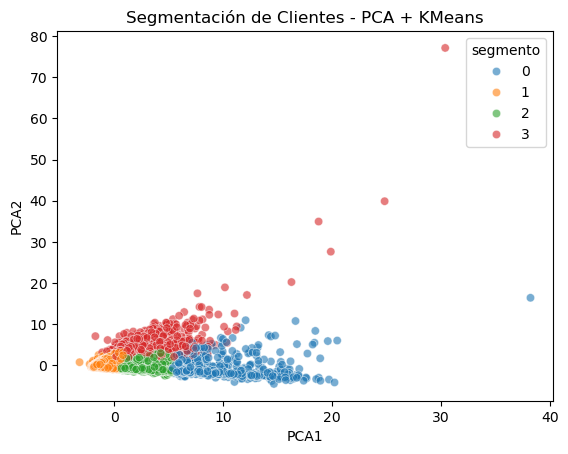

In [168]:

# Paso 7: KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42)

df["segmento"] = kmeans.fit_predict(X_scaled)

# Paso 8: Visualizar clusters
df["PCA1"] = X_pca[:, 0]
df["PCA2"] = X_pca[:, 1]

sns.scatterplot(data=df, x="PCA1", y="PCA2", hue="segmento", palette="tab10", alpha=0.6)
plt.title("Segmentación de Clientes - PCA + KMeans")
plt.show()

In [170]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month,segmento,PCA1,PCA2
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,689,0,0,0,0,1,1,-1.918053,-0.447233
1,120000,2,2,2,26,-1,2,0,0,0,...,0,1000,1000,1000,0,2000,1,1,-1.702457,-0.147669
2,90000,2,2,2,34,0,0,0,0,0,...,1518,1500,1000,1000,1000,5000,0,1,-1.219277,-0.274554
3,50000,2,2,1,37,0,0,0,0,0,...,2000,2019,1200,1100,1069,1000,0,1,-0.545880,-0.676178
4,50000,1,2,1,57,-1,0,-1,0,0,...,2000,36681,10000,9000,689,679,0,1,-0.925109,0.578793


In [172]:
# Guardar como archivo Excel
df.to_excel("Miprimerasegmentacio.xlsx", index=False)

In [51]:
df["segmento"] = kmeans.fit_predict(X_scaled)

# 🧭 Variables de Comportamiento de Pago  
**Fuente:** *Dataset “Default of Credit Card Clients” (OpenML)*  
**Objetivo:** Analizar el comportamiento financiero y de pago de los clientes para identificar patrones de riesgo, incumplimiento o mal uso del crédito.

---

## 🧩 1️⃣ Variables Base

| Variable | Descripción |
|-----------|--------------|
| `total_facturado` | Suma total de los montos facturados en los últimos 6 meses (`BILL_AMT1–6`). |
| `total_pagado` | Suma total de los pagos realizados en los últimos 6 meses (`PAY_AMT1–6`). |
| `pago_promedio` | Promedio de los pagos mensuales. |
| `facturacion_promedio` | Promedio de la facturación mensual. |
| `porcentaje_pago_vs_factura` | Proporción entre lo pagado y lo facturado en total. |

---

## 💰 2️⃣ Comportamiento de Pago

| Variable | Descripción |
|-----------|--------------|
| `meses_pago_0` | Número de meses con pagos en 0. |
| `meses_factura_sin_pago` | Meses en que hubo facturación pero no se realizó pago. |
| `max_mora` / `min_mora` / `promedio_mora` | Nivel máximo, mínimo y promedio de mora reportada (`PAY_0–6`). |
| `meses_en_mora` | Número de meses con mora (PAY_X > 0). |
| `meses_al_dia` | Meses con pagos a tiempo o anticipados (PAY_X ≤ 0). |
| `proporcion_meses_puntuales` | Porcentaje de meses sin mora respecto al total. |

---

## 🧮 3️⃣ Uso del Crédito

| Variable | Descripción |
|-----------|--------------|
| `limite_credito` | Límite de crédito otorgado al cliente (`LIMIT_BAL`). |
| `uso_promedio_credito` | Promedio de uso del crédito (saldo promedio / límite). |
| `uso_max_credito` / `uso_min_credito` | Porcentaje máximo y mínimo de utilización del crédito. |
| `tendencia_uso_credito` | Variación del saldo entre el primer y último mes (`BILL_AMT6 - BILL_AMT1`). |
| `variacion_saldo_pct` | Cambio porcentual del saldo entre el primer y último mes. |

---

## 📅 4️⃣ Disciplina de Pago

| Variable | Descripción |
|-----------|--------------|
| `ratio_pago_bill_i` | Relación pago/factura para cada mes i (1 a 6). |
| `desviacion_ratio_pago_factura` | Variabilidad en la proporción pago/factura a lo largo de los meses. |
| `tendencia_pagos` | Diferencia entre el último pago y el primero (`PAY_AMT6 - PAY_AMT1`). |

---

## 🚨 5️⃣ Indicadores de Alerta

| Variable | Descripción |
|-----------|--------------|
| `alerta_todos_pagos_0` | Cliente que no realizó pagos en ninguno de los 6 meses. |
| `alerta_alto_uso_credito` | Uso máximo del crédito superior al 90% del límite. |
| `alerta_multiples_moras` | Más de 2 meses en mora. |
| `alerta_pagos_bajos` | Pagos promedio menores al 20% del valor facturado. |
| `alerta_total` | Suma total de alertas. |
| `nivel_alerta` | Clasificación cualitativa del riesgo: *Sin alerta, Leve, Moderada, Alta, Crítica.* |

---

## 📊 6️⃣ Resumen Analítico

| Categoría | Indicadores Clave | Propósito |
|------------|------------------|------------|
| **Pagos** | `total_pagado`, `meses_pago_0`, `tendencia_pagos` | Mide capacidad y hábito de pago. |
| **Facturación** | `total_facturado`, `variacion_saldo_pct` | Evalúa evolución de deuda. |
| **Uso de Crédito** | `uso_promedio_credito`, `uso_max_credito` | Analiza aprovechamiento del límite. |
| **Mora** | `meses_en_mora`, `promedio_mora` | Identifica incumplimientos históricos. |
| **Alertas** | `alerta_todos_pagos_0`, `alerta_multiples_moras`, `alerta_pagos_bajos` | Señala comportamientos de riesgo o mal uso. |

---

## 🔍 Interpretación General

- Los clientes con **pago_promedio bajo**, **uso_max_credito alto** y **meses_en_mora elevados** presentan **mayor probabilidad de incumplimiento**.  
- Un **porcentaje_pago_vs_factura alto** indica cumplimiento saludable.  
- La **tendencia negativa de pagos** o **alto número de meses con pago 0** son señales de **deterioro de comportamiento crediticio**.  
- La combinación de alertas permite establecer un **índice de riesgo operativo o reputacional** aplicable en SAGRILAFT o modelos de scoring crediticio.


In [186]:
import numpy as np
import pandas as pd

# ===========================================
# BASE DE DATOS: Default of Credit Card Clients
# ===========================================
# df = fetch_openml(name='default-of-credit-card-clients', version=1, as_frame=True).frame
# df.columns = [
#     "LIMIT_BAL", "SEX", "EDUCATION", "MARRIAGE", "AGE",
#     "PAY_0", "PAY_2", "PAY_3", "PAY_4", "PAY_5", "PAY_6",
#     "BILL_AMT1", "BILL_AMT2", "BILL_AMT3", "BILL_AMT4", "BILL_AMT5", "BILL_AMT6",
#     "PAY_AMT1", "PAY_AMT2", "PAY_AMT3", "PAY_AMT4", "PAY_AMT5", "PAY_AMT6",
#     "default.payment.next.month"
# ]

# ----------------------------
# 1️⃣ VARIABLES BASE
# ----------------------------
bill_cols = [f'BILL_AMT{i}' for i in range(1, 7)]
pay_cols  = [f'PAY_AMT{i}'  for i in range(1, 7)]
pay_stat  = ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']  # columnas reales

# Asegurar que sean numéricas
df[bill_cols + pay_cols + pay_stat] = df[bill_cols + pay_cols + pay_stat].apply(pd.to_numeric, errors='coerce')

# Totales y promedios
df["total_facturado"] = df[bill_cols].sum(axis=1)
df["total_pagado"] = df[pay_cols].sum(axis=1)
df["pago_promedio"] = df[pay_cols].mean(axis=1)
df["facturacion_promedio"] = df[bill_cols].mean(axis=1)

# Relación entre facturación y pagos
df["porcentaje_pago_vs_factura"] = np.where(df["total_facturado"] > 0,
                                            df["total_pagado"] / df["total_facturado"], np.nan)

# ----------------------------
# 2️⃣ COMPORTAMIENTO DE PAGO
# ----------------------------
# Número de meses con pago en 0
df["meses_pago_0"] = (df[pay_cols] == 0).sum(axis=1)

# Número de meses con facturación > 0 y pago = 0
df["meses_factura_sin_pago"] = ((df[bill_cols] > 0) & (df[pay_cols] == 0)).sum(axis=1)

# Máxima, mínima y promedio de mora reportada
df["max_mora"] = df[pay_stat].max(axis=1)
df["min_mora"] = df[pay_stat].min(axis=1)
df["promedio_mora"] = df[pay_stat].mean(axis=1)

# Cantidad de meses en mora (PAY_X > 0)
df["meses_en_mora"] = (df[pay_stat] > 0).sum(axis=1)

# Cantidad de meses con pago anticipado o puntual (PAY_X <= 0)
df["meses_al_dia"] = (df[pay_stat] <= 0).sum(axis=1)

# Proporción de meses puntuales
df["proporcion_meses_puntuales"] = df["meses_al_dia"] / 6

# ----------------------------
# 3️⃣ USO DEL CRÉDITO
# ----------------------------
df["limite_credito"] = df["LIMIT_BAL"]

# Uso promedio, máximo y mínimo del crédito (%)
df["uso_promedio_credito"] = np.where(df["limite_credito"] > 0,
                                      df[bill_cols].mean(axis=1) / df["limite_credito"], np.nan)
df["uso_max_credito"] = np.where(df["limite_credito"] > 0,
                                 df[bill_cols].max(axis=1) / df["limite_credito"], np.nan)
df["uso_min_credito"] = np.where(df["limite_credito"] > 0,
                                 df[bill_cols].min(axis=1) / df["limite_credito"], np.nan)

# Tendencia del uso (última - primera facturación)
df["tendencia_uso_credito"] = df["BILL_AMT6"] - df["BILL_AMT1"]

# Crecimiento porcentual del saldo (último/primero)
df["variacion_saldo_pct"] = np.where(df["BILL_AMT1"] != 0,
                                     (df["BILL_AMT6"] - df["BILL_AMT1"]) / np.abs(df["BILL_AMT1"]), np.nan)

# ----------------------------
# 4️⃣ DISCIPLINA DE PAGO
# ----------------------------
# Ratio pago/factura mensual
for i in range(1, 7):
    df[f"ratio_pago_bill_{i}"] = np.where(df[f"BILL_AMT{i}"] > 0,
                                          df[f"PAY_AMT{i}"] / df[f"BILL_AMT{i}"], np.nan)

# Desviación estándar del ratio pago/factura
df["desviacion_ratio_pago_factura"] = df[[f"ratio_pago_bill_{i}" for i in range(1, 7)]].std(axis=1)

# Tendencia de pagos (PAY_AMT6 vs PAY_AMT1)
df["tendencia_pagos"] = df["PAY_AMT6"] - df["PAY_AMT1"]

# ----------------------------
# 5️⃣ INDICADORES DE ALERTA
# ----------------------------
df["alerta_todos_pagos_0"] = (df["meses_pago_0"] == 6).astype(int)
df["alerta_alto_uso_credito"] = (df["uso_max_credito"] > 0.9).astype(int)
df["alerta_multiples_moras"] = (df["meses_en_mora"] > 2).astype(int)
df["alerta_pagos_bajos"] = np.where(
    df["facturacion_promedio"] > 0,
    (df["pago_promedio"] / df["facturacion_promedio"]) < 0.2,
    0
).astype(int)

# Suma de alertas
df["alerta_total"] = df[[
    "alerta_todos_pagos_0",
    "alerta_alto_uso_credito",
    "alerta_multiples_moras",
    "alerta_pagos_bajos"
]].sum(axis=1)

# Nivel de alerta categórico
df["nivel_alerta"] = pd.cut(
    df["alerta_total"],
    bins=[-1, 0, 1, 2, 3, 4],
    labels=["Sin alerta", "Leve", "Moderada", "Alta", "Crítica"]
)




In [188]:
# ----------------------------
# 6️⃣ RESUMEN DESCRIPTIVO
# ----------------------------
resumen = df[[
    "limite_credito", "total_facturado", "total_pagado", "pago_promedio",
    "uso_promedio_credito", "uso_max_credito", "meses_en_mora",
    "proporcion_meses_puntuales", "variacion_saldo_pct",
    "alerta_total", "nivel_alerta"
]].describe().T

print("\nResumen general de variables de comportamiento de pago:\n")
print(resumen.round(3))



Resumen general de variables de comportamiento de pago:

                              count        mean         std         min  \
limite_credito              30000.0  167484.323  129747.662   10000.000   
total_facturado             30000.0  269861.671  379564.331 -336259.000   
total_pagado                30000.0   31651.393   60827.678       0.000   
pago_promedio               30000.0    5275.232   10137.946       0.000   
uso_promedio_credito        30000.0       0.373       0.352      -0.233   
uso_max_credito             30000.0       0.495       0.433      -0.100   
meses_en_mora               30000.0       0.834       1.554       0.000   
proporcion_meses_puntuales  30000.0       0.861       0.259       0.000   
variacion_saldo_pct         27992.0       9.642     285.686   -2505.000   
alerta_total                30000.0       1.017       0.917       0.000   

                                  25%         50%         75%          max  
limite_credito              50000.000  

## ¿Qué sigue?



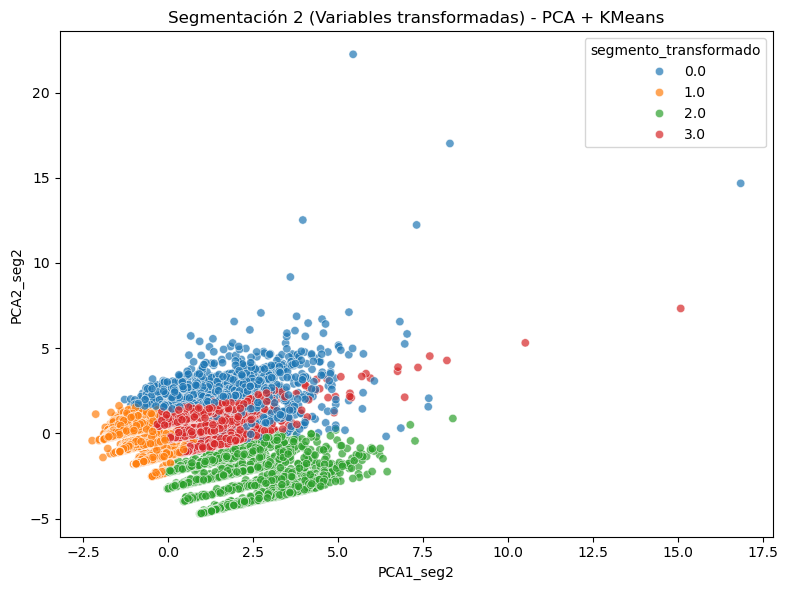

In [190]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# =====================================================
# SEGMENTACIÓN 2: con variables transformadas
# =====================================================
vars_segmento_2 = [
    "uso_promedio_credito",
    "uso_max_credito",
    "meses_en_mora",
    "proporcion_meses_puntuales",
    "pago_promedio",
    "facturacion_promedio"]

# Escalar y preparar datos
X2 = df[vars_segmento_2].dropna()
scaler2 = StandardScaler()
X2_scaled = scaler2.fit_transform(X2)

# PCA (solo para visualización y coherencia)
pca2 = PCA(n_components=2, random_state=42)
X2_pca = pca2.fit_transform(X2_scaled)

# K-Means (segunda segmentación)
kmeans2 = KMeans(n_clusters=4, random_state=42)
segmentos_2 = kmeans2.fit_predict(X2_scaled)

# =====================================================
# UNIR RESULTADOS AL DF ORIGINAL
# =====================================================
df.loc[X2.index, "segmento_original"] = df.loc[X2.index, "segmento"]  # primera segmentación
df.loc[X2.index, "segmento_transformado"] = segmentos_2               # segunda segmentación
df.loc[X2.index, "PCA1_seg2"] = X2_pca[:, 0]
df.loc[X2.index, "PCA2_seg2"] = X2_pca[:, 1]

# =====================================================
# VISUALIZACIÓN COMPARATIVA (PCA SEGMENTACIÓN 2)
# =====================================================
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.scatterplot(data=df.loc[X2.index], x="PCA1_seg2", y="PCA2_seg2", hue="segmento_transformado",
                palette="tab10", alpha=0.7)
plt.title("Segmentación 2 (Variables transformadas) - PCA + KMeans")
plt.tight_layout()
plt.show()


In [192]:
# Inventario detallado de columnas con tipo de dato y nulos
inventario_df = pd.DataFrame({
    'Variable': df.columns,
    'Tipo_dato': df.dtypes.astype(str),
    'Nulos': df.isnull().sum(),
    'Porcentaje_nulos': (df.isnull().mean() * 100).round(2)
})

print("\nInventario detallado de variables:\n")
display(inventario_df.head(50))  # Muestra las primeras 50 filas


Inventario detallado de variables:



,Variable,Tipo_dato,Nulos,Porcentaje_nulos
LIMIT_BAL,LIMIT_BAL,int64,0,0.00
SEX,SEX,int64,0,0.00
EDUCATION,EDUCATION,int64,0,0.00
MARRIAGE,MARRIAGE,int64,0,0.00
AGE,AGE,int64,0,0.00
PAY_0,PAY_0,int64,0,0.00
PAY_2,PAY_2,int64,0,0.00
PAY_3,PAY_3,int64,0,0.00
PAY_4,PAY_4,int64,0,0.00
PAY_5,PAY_5,int64,0,0.00


In [194]:
pd.crosstab(df["segmento_original"], df["segmento_transformado"], normalize="index").round(2)

segmento_transformado,0.0,1.0,2.0,3.0
segmento_original,,,,
0.0,0.93,0.00,0.07,0.00
1.0,0.00,0.61,0.12,0.27
2.0,0.14,0.11,0.15,0.61
3.0,0.53,0.44,0.01,0.03


In [196]:
# Guardar como archivo Excel
df.to_excel("Misegundasegmentacio.xlsx", index=False)

## Sistema de alertas

In [132]:
df.head(20)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,alerta_todos_pagos_0,alerta_alto_uso_credito,alerta_multiples_moras,alerta_pagos_bajos,alerta_total,nivel_alerta,segmento_original,segmento_transformado,PCA1_seg2,PCA2_seg2
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,1,1,Leve,1.0,1.0,-0.602022,-1.633686
1,120000,2,2,2,26,-1,2,0,0,0,...,0,0,0,0,0,Sin alerta,1.0,1.0,-0.853554,-1.723266
2,90000,2,2,2,34,0,0,0,0,0,...,0,0,0,1,1,Leve,1.0,1.0,-1.082364,0.121550
3,50000,2,2,1,37,0,0,0,0,0,...,0,1,0,1,2,Moderada,1.0,3.0,0.765934,0.963855
4,50000,1,2,1,57,-1,0,-1,0,0,...,0,0,0,0,0,Sin alerta,1.0,3.0,-0.265280,0.728259
5,50000,1,1,2,37,0,0,0,0,0,...,0,1,0,1,2,Moderada,1.0,3.0,1.173509,1.159656
6,500000,1,1,2,29,0,0,0,0,0,...,0,1,0,1,2,Moderada,0.0,0.0,3.801067,4.496321
7,100000,2,2,2,23,0,-1,-1,0,0,...,0,0,0,0,0,Sin alerta,1.0,1.0,-1.689518,-0.217484
8,140000,2,3,1,28,0,0,2,0,0,...,0,0,0,1,1,Leve,1.0,1.0,-1.100573,-0.863620
9,20000,1,3,2,35,-2,-2,-2,-2,-1,...,0,0,0,0,0,Sin alerta,1.0,1.0,-0.647704,0.306458


In [ ]:
from google.colab import files

# Guardar como archivo Excel
df.to_excel("Segementación.xlsx", index=False)







In [128]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X1_scaled = scaler.fit_transform(df[["LIMIT_BAL", "AGE", "PAY_0", "PAY_2", "PAY_3", "BILL_AMT1", "PAY_AMT1"]].dropna())
X2_scaled = scaler.fit_transform(df[["uso_promedio_credito", "pago_promedio", "alerta_total", "meses_en_mora"]].dropna())

pca1 = PCA(n_components=2).fit(X1_scaled)
pca2 = PCA(n_components=2).fit(X2_scaled)

print("Varianza explicada PCA originales:", pca1.explained_variance_ratio_.sum())
print("Varianza explicada PCA transformadas:", pca2.explained_variance_ratio_.sum())


Varianza explicada PCA originales: 0.572992653719494
Varianza explicada PCA transformadas: 0.7712025340493341


In [130]:
pd.crosstab(df["segmento_original"], df["segmento_transformado"], normalize="index").round(2)

segmento_transformado,0.0,1.0,2.0,3.0
segmento_original,,,,
0.0,0.93,0.00,0.07,0.00
1.0,0.00,0.61,0.12,0.27
2.0,0.14,0.11,0.15,0.61
3.0,0.53,0.44,0.01,0.03
